# **Processamento de Imagens e Imagens**
Engenharia da Computação - 2021.01

## Calculo do Histograma

### Download das imagens de teste

In [11]:
!wget "https://homepages.cae.wisc.edu/~ece533/images/peppers.png"
!wget "https://homepages.cae.wisc.edu/~ece533/images/baboon.png"
!wget "https://homepages.cae.wisc.edu/~ece533/images/airplane.png"
!wget "https://homepages.cae.wisc.edu/~ece533/images/lena.png"

--2021-04-04 21:36:46--  https://homepages.cae.wisc.edu/~ece533/images/peppers.png
Resolving homepages.cae.wisc.edu (homepages.cae.wisc.edu)... 144.92.13.84, 2607:f388:1082:0:279f:7b00:a091:17d7
Connecting to homepages.cae.wisc.edu (homepages.cae.wisc.edu)|144.92.13.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 538749 (526K) [image/png]
Saving to: ‘peppers.png.1’

peppers.png.1       100%[===================>] 526.12K  1.61MB/s    in 0.3s    

2021-04-04 21:36:46 (1.61 MB/s) - ‘peppers.png.1’ saved [538749/538749]

--2021-04-04 21:36:46--  https://homepages.cae.wisc.edu/~ece533/images/baboon.png
Resolving homepages.cae.wisc.edu (homepages.cae.wisc.edu)... 144.92.13.84, 2607:f388:1082:0:279f:7b00:a091:17d7
Connecting to homepages.cae.wisc.edu (homepages.cae.wisc.edu)|144.92.13.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 637192 (622K) [image/png]
Saving to: ‘baboon.png.1’

baboon.png.1        100%[===================>] 622.2

### Imports

In [12]:
import cv2 as cv
import matplotlib.pyplot as plt

### Code

In [13]:
img1 = cv.imread('peppers.png')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img1 = cv.cvtColor(img1, cv.COLOR_RGB2GRAY)

In [14]:
# Cálculo do histograma
hist1 = cv.calcHist([img1], [0], None, [256], [0, 255])

# Cálculo do histograma equalizado
img2 = cv.equalizeHist(img1)
hist2 = cv.calcHist([img2], [0], None, [256], [0, 255])

# Correção de brilho
img3 = img1.copy()
img3 = cv.add(img3, + 100)
hist3 = cv.calcHist([img3], [0], None, [256], [0, 255])

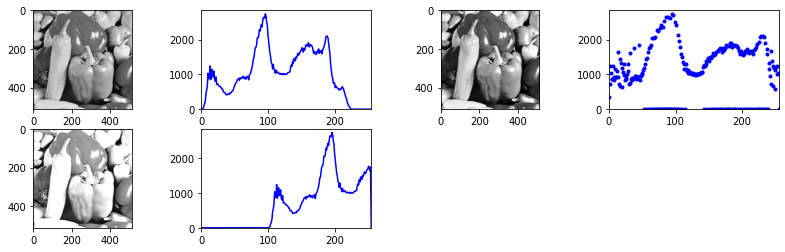

In [15]:
plt.figure(figsize=(14, 4))
plt.subplot(241), plt.imshow(img1, cmap='gray')
plt.subplot(242), plt.plot(hist1, '-', color='blue'), plt.xlim(0, 255), plt.ylim(0, max(hist1) + 100)

plt.subplot(243), plt.imshow(img2, cmap='gray')
plt.subplot(244), plt.plot(hist2, '.', color='blue'), plt.xlim(0, 255), plt.ylim(0, max(hist2) + 100)

plt.subplot(245), plt.imshow(img3, cmap='gray')
plt.subplot(246), plt.plot(hist3, '-', color='blue'), plt.xlim(0, 255), plt.ylim(0, max(hist2) + 100)

plt.show()

In [16]:
img1 = cv.imread('peppers.png')
img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)

# Cálculo do histograma em imagem colorida
hr = cv.calcHist([img1], [0], None, [256], [0, 255])
hg = cv.calcHist([img1], [1], None, [256], [0, 255])
hb = cv.calcHist([img1], [2], None, [256], [0, 255])

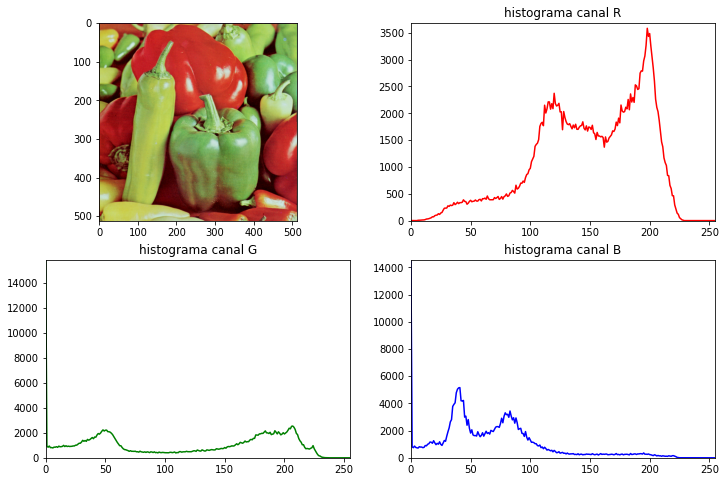

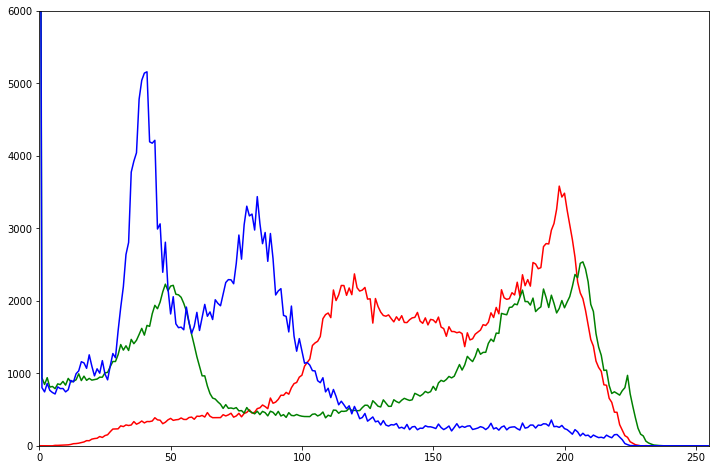

In [17]:
plt.figure(figsize=(12, 8))
plt.subplot(221), plt.imshow(img1)
plt.subplot(222), plt.plot(hr, '-', color='red'), plt.xlim(0, 255), plt.ylim(0, max(hr) + 100), plt.title('histograma canal R')
plt.subplot(223), plt.plot(hg, '-', color='green'), plt.xlim(0, 255), plt.ylim(0, max(hg) + 100), plt.title('histograma canal G')
plt.subplot(224), plt.plot(hb, '-', color='blue'), plt.xlim(0, 255), plt.ylim(0, max(hb) + 100), plt.title('histograma canal B')
plt.show()

plt.figure(figsize=(12,8))
plt.plot(hr, '-', color='red'), plt.plot(hg, '-', color='green'), plt.plot(hb, '-', color='blue'), plt.xlim(0, 255), plt.ylim(0, 6000)
plt.show()

### Exercises

#### Imports

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#### Code

# Operações Pontuais - Exercício 4 (Slide 43)

In [19]:
A = cv.imread('peppers.png')
A = cv.cvtColor(A, cv.COLOR_BGR2RGB)

B = cv.imread('baboon.png')
B = cv.cvtColor(B, cv.COLOR_BGR2RGB)

C = cv.imread('airplane.png')
C = cv.cvtColor(C, cv.COLOR_BGR2RGB)

D = cv.imread('lena.png')
D = cv.cvtColor(D, cv.COLOR_BGR2RGB)

# (A + B) * C
R1 = cv.add(A, B)
R1 = cv.multiply(R1, C)

# (A + B + C) * D
R2 = cv.add(cv.add(A, B), C)
R2 = cv.multiply(R2, D)

#(A + B) * (C + D)
R3 = cv.multiply(cv.add(A, B), cv.add(C, D))

#(A * 0.80) + (B * 0.60) + (C * 0.40) + (D*0.20)
R4 = cv.add(cv.multiply(A, 0.80), cv.multiply(B, 0.60))
R4 = cv.add(R4, cv.multiply(C, 0.40))
R4 = cv.add(R4, cv.multiply(D, 0.40))

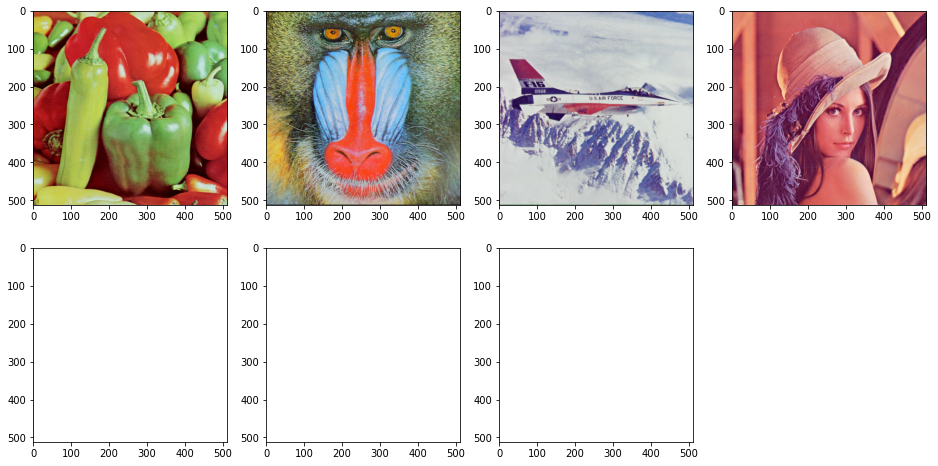

In [20]:
plt.figure(figsize=(16, 8))
plt.subplot(241), plt.imshow(A)
plt.subplot(242), plt.imshow(B)
plt.subplot(243), plt.imshow(C)
plt.subplot(244), plt.imshow(D)

plt.subplot(245), plt.imshow(R1),
plt.subplot(246), plt.imshow(R2),
plt.subplot(247), plt.imshow(R3),

plt.show()